   # Analyzing Covid-19 Data

![JMU_IA_LOGO](https://creative.chbs.jmu.edu/images/logos/intelligence-analysis.png)

## Background
Coronavirus is an acute disease in humans, which is characterized mainly by fever and cough and is capable of progressing to severe symptoms and in some cases death, especially in older people and those with underlying health conditions. In late 2019, the first identification of Covid-19 occurred in Wuhan, China. Despite efforts to contain the virus, it rapidly spread. On January 30th, 2020, the World Health Organization recognized it as an international concern. On March 11th, 2020, the virus was declared a global pandemic, resulting in significant social and economic disruption. The data presented in this report provides insights into how the virus impacted the world throughout the year 2020.

## Data
The data is provided by the European Centre for
[Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

## Importing Data

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
!pip install xlrd
df = pd.read_excel('s3://jrf-ia241-bucket/covid_data.xls')
df.head(10)

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 4.3 MB/s eta 0:00:00


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-09-12 00:00:00,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-08-12 00:00:00,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-07-12 00:00:00,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-06-12 00:00:00,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-05-12 00:00:00,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## Q1: What are the top 10 countries with the highest recorded cases from Covid-19 ?

<AxesSubplot: xlabel='countriesAndTerritories'>

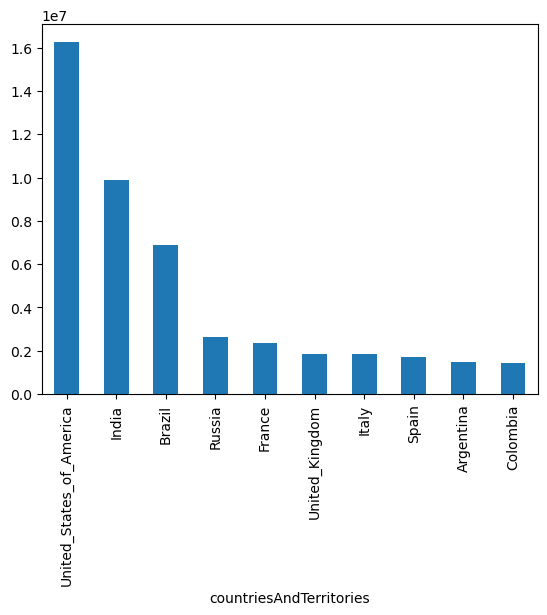

In [14]:
death_countries= df.groupby('countriesAndTerritories')['cases'].sum()
death_countries.nlargest(10).plot.bar()

### Calculations
The death_countries is calculated to show the maximum deaths in the top 10 countries. This is done by using using df.groupby() to group the variable of 'countriesAndTerritories' which is shown on the x axis and selecting the 'cases' variable and using .sum() to show the total number of cases to the 10^7 power on the y axis. In the second line the .nlargest(10) seperates the top ten countries with the largest cases value. Using the .plot.bar generates a bar chart with 'countriesAndTerritories' and 'cases'.

### Explanation

## United States Covid-19 Data

In [10]:
usa_data = df.loc[df['countriesAndTerritories'] == 'United_States_of_America']
usa_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate
59001,14/12/2020,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592,0.007063
59002,13/12/2020,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241,0.010717
59003,2020-12-12 00:00:00,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183,0.014248
59004,2020-11-12 00:00:00,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205,0.012231
59005,2020-10-12 00:00:00,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027,0.014198
59006,2020-09-12 00:00:00,9,12,2020,217344,2564,United_States_of_America,US,USA,329064917.0,America,784.195114,0.011797
59007,2020-08-12 00:00:00,8,12,2020,197334,1433,United_States_of_America,US,USA,329064917.0,America,769.896719,0.007262
59008,2020-07-12 00:00:00,7,12,2020,173432,1111,United_States_of_America,US,USA,329064917.0,America,762.794473,0.006406
59009,2020-06-12 00:00:00,6,12,2020,211933,2203,United_States_of_America,US,USA,329064917.0,America,757.944062,0.010395
59010,2020-05-12 00:00:00,5,12,2020,231930,2680,United_States_of_America,US,USA,329064917.0,America,746.870564,0.011555


### Calculation
Seperating the United States data was done by using the df.loc() and selecting the variable 'countriesAndTerritories' and making it equal to value of 'United_States_of_America'. This code seperates the United States data from the rest of the countries.

## Q2: What are the average Covid-19 cases in the US per month?

<AxesSubplot: xlabel='month'>

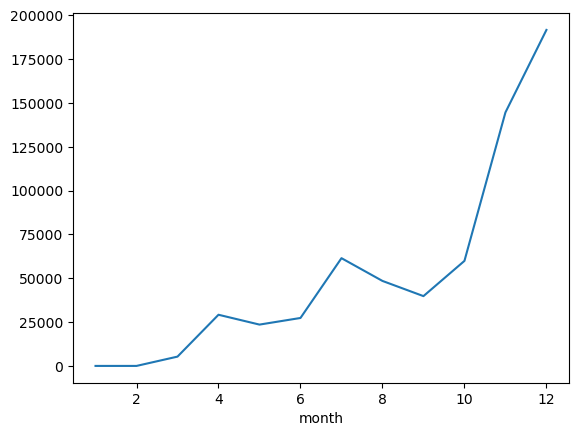

In [11]:
avg_covid_month = usa_data.groupby('month') ['cases'].mean()
avg_covid_month.plot()

### Calculation 
The avg_covid_month is calculating the average amount of cases on the y axis and the months that they occured on the x axis. Using the usa_data.groupby() grouped the data by the selected column 'months' and the .mean() calculated the mean for the variable 'cases'. The output is a line chart this was done using .plot().

### Explanation

## Q3: What is the death rate for Covid-19 in the United States?

In [12]:
df['death_rate'] = df['deaths']/df['cases']
df[:5]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,death_rate
0,14/12/2020,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779,0.008043
1,13/12/2020,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776,0.030201
2,2020-12-12 00:00:00,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768,0.097345
3,2020-11-12 00:00:00,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266,0.158730
4,2020-10-12 00:00:00,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658,0.079208


<AxesSubplot: xlabel='month', ylabel='death_rate'>

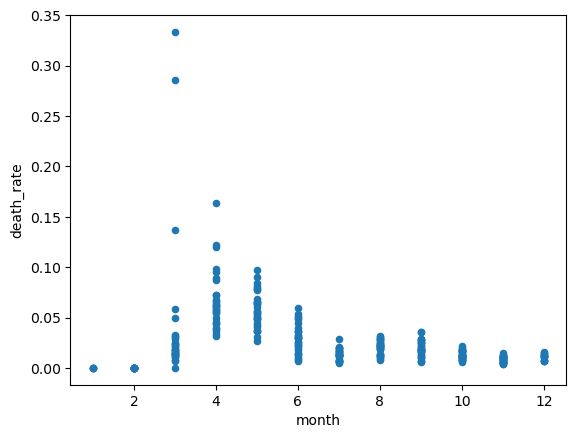

In [13]:
usa_data.plot.scatter(x='month',y='death_rate')

### Calculations
3a.) Creating the 'death_rate' variable was done by selecting the variable columns 'deaths' and 'cases'. Once we divide the variables we got the amount of deaths per cases. 

3b.) To create the scatter plot using US data we selected the US data variable of 'usa_data' and using the .plot.scatter and the variables for the scatter plot are 'month' on the x axis and the new variable created 'death_rate' on the y axis.

### Explanation

## Conclusion 

### Limitations 


### Implications

## Authors
-  Nathan Daly & John Fleetwood
-  nathanjdaly2002@gmail.com & fleet2jr@dukes.jmu.edu
-  IA 241 Spring 2023
-  James Madison University 